# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Bambee Garfield

[CSIS44620_Module6](https://github.com/Bambee26/CSIS44620_Module6)


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [20]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy   

<span style="font-family: times new roman; color: red; font-size: larger;">Module 6, Question 1</span>


<div style="background-color: #F88383; padding: 10px;">
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)
</div>

In [21]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content of the webpage
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article HTML
article_html = soup.find("article")

# Convert the article HTML to a string
article_html_str = str(article_html)

# Dump the article HTML string to a .pkl file
with open("article.pkl", "wb") as f:
    pickle.dump(article_html_str, f)


<span style="font-family: times new roman; color: orange; font-size: larger;">Module 6, Question 2</span>


<div style="background-color: #F8BE83; padding: 10px;">
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)
</div>

In [22]:
import pickle
from bs4 import BeautifulSoup

# Load the article HTML from the .pkl file
with open("article.pkl", "rb") as f:
    article_html_str = pickle.load(f)

# Create a BeautifulSoup object from the HTML string
soup = BeautifulSoup(article_html_str, "html.parser")

# Extract text from the BeautifulSoup object
article_text = soup.get_text()

# Print the extracted text
print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

<span style="font-family: times new roman; color: gold; font-size: larger;">Module 6, Question 3</span>


<div style="background-color: #F8F183; padding: 10px;">
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).
</div>

In [23]:
import pickle
import spacy
from collections import Counter
import string

# Load the article text from the .pkl file
with open("article.pkl", "rb") as f:
    article_html_str = pickle.load(f)

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_html_str)

# Tokenize the text, convert tokens to lowercase, and filter out punctuation, stopwords, and whitespace
tokens = [token.text.lower() for token in doc if token.text.lower() not in string.punctuation and not token.is_stop and not token.is_space]

# Count the frequencies of tokens
token_freq = Counter(tokens)

# Print the 5 most frequent tokens along with their frequencies
print("5 Most Frequent Tokens:")
for token, freq in token_freq.most_common(5):
    print(f"{token}: {freq}")

# Print all tokens with their frequencies
print("\nTokens and Frequencies:")
for token, freq in token_freq.items():
    print(f"{token}: {freq}")


5 Most Frequent Tokens:
laser: 71
web/20210327165005: 40
data: 40
headlights: 37
wp: 30

Tokens and Frequencies:
article: 2
class="post-466450: 1
post: 4
type: 1
status: 1
publish: 1
format: 1
standard: 2
thumbnail: 1
hentry: 1
category: 10
car: 3
hacks: 2
engineering: 2
featured: 2
laser: 71
slider: 1
tag: 8
headlight: 19
headlights: 37
light: 17
id="post-466450: 1
itemscope=: 1
itemtype="http://schema.org: 1
header: 3
class="entry: 8
h1: 1
title: 1
itemprop="name">how: 1
work</h1: 1
div: 4
meta: 5
class="comments: 1
counts: 1
href="https://web.archive.org: 23
web/20210327165005: 40
https://hackaday.com/2021/03/22: 6
work/#comments"><span: 1
class="icon: 3
hackaday: 6
icon: 3
comment"></span: 1
130: 1
comments: 5
/a: 5
ul: 3
class="meta: 1
authors: 1
vcard: 1
author: 2
li: 5
by:</li: 1
span: 3
class="fn"><a: 1
class="author: 1
url: 1
fn: 1
https://hackaday.com: 22
lewinday/: 1
rel="author: 1
title="posts: 1
lewin: 1
day">lewin: 1
day</a></span: 1
/ul: 3
/div><!--: 3
.entry: 5
--: 5
en

<span style="font-family: times new roman; color: lawngreen; font-size: larger;">Module 6, Question 4</span>


<div style="background-color: #B3F883; padding: 10px;">
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).
</div>


In [24]:
import pickle
import spacy
from collections import Counter
import string

# Load the article text from the .pkl file
with open("article.pkl", "rb") as f:
    article_html_str = pickle.load(f)

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_html_str)

# Filter out punctuation, stopwords, and whitespace and extract lemmas
lemmas = [token.lemma_.lower() for token in doc if token.lemma_.lower() not in string.punctuation and not token.is_stop and not token.is_space]

# Count the frequencies of lemmas
lemma_freq = Counter(lemmas)

# Print the 5 most frequent lemmas along with their frequencies
print("5 Most Frequent Lemmas:")
for lemma, freq in lemma_freq.most_common(5):
    print(f"{lemma}: {freq}")

# Print all lemmas with their frequencies
print("\nLemmas and Frequencies:")
for lemma, freq in lemma_freq.items():
    print(f"{lemma}: {freq}")


5 Most Frequent Lemmas:
laser: 75
headlight: 55
web/20210327165005: 40
data: 39
wp: 30

Lemmas and Frequencies:
article: 2
class="post-466450: 1
post: 4
type: 1
status: 1
publish: 2
format: 1
standard: 2
thumbnail: 1
hentry: 1
category: 10
car: 3
hack: 2
engineering: 2
feature: 2
laser: 75
slider: 1
tag: 8
headlight: 55
light: 18
id="post-466450: 1
itemscope=: 1
itemtype="http://schema.org: 1
header: 3
class="entry: 8
h1: 1
title: 1
itemprop="name">how: 1
headlights: 1
work</h1: 1
div: 4
meta: 5
class="comment: 1
count: 1
href="https://web.archive.org: 23
web/20210327165005: 40
https://hackaday.com/2021/03/22: 6
work/#comments"><span: 1
class="icon: 3
hackaday: 6
icon: 3
comment"></span: 1
130: 1
comments: 1
/a: 5
ul: 3
class="meta: 1
author: 3
vcard: 1
li: 5
by:</li: 1
span: 3
class="fn"><a: 1
class="author: 1
url: 1
fn: 1
https://hackaday.com: 22
lewinday/: 1
rel="author: 1
title="post: 1
lewin: 1
day">lewin: 1
day</a></span: 1
/ul: 3
/div><!--: 3
.entry: 5
--: 5
entry: 1
date: 1
upd

<span style="font-family: times new roman; color: deepskyblue; font-size: larger;">Module 6, Question 5</span>


<div style="background-color: #83F1F8; padding: 10px;">
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.
</div>

In [25]:
# Define the methods
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    tokens = sentence.split()
    # Count the number of interesting tokens in the sentence
    interesting_count = sum(1 for token in tokens if token.lower() in interesting_tokens)
    # Return the score
    return interesting_count / len(tokens)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy pipeline
    doc = nlp(sentence)
    # Extract lemmas
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space]
    # Count the number of interesting lemmas in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    # Return the score
    return interesting_count / len(lemmas)

# Test the methods with the first sentence of the article and frequent tokens
first_sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind."
frequent_tokens = ["laser", "web/20210327165005", "data", "headlights", "wp"]

token_score = score_sentence_by_token(first_sentence, frequent_tokens)
token_score = round(token_score, 2)  # Truncate to 2 decimal places
print("Score by Token:", token_score)


Score by Token: 0.03


<span style="font-family: times new roman; color: blue; font-size: larger;">Module 6, Question 6</span>


<div style="background-color: #83B8F8; padding: 10px;">
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
</div>

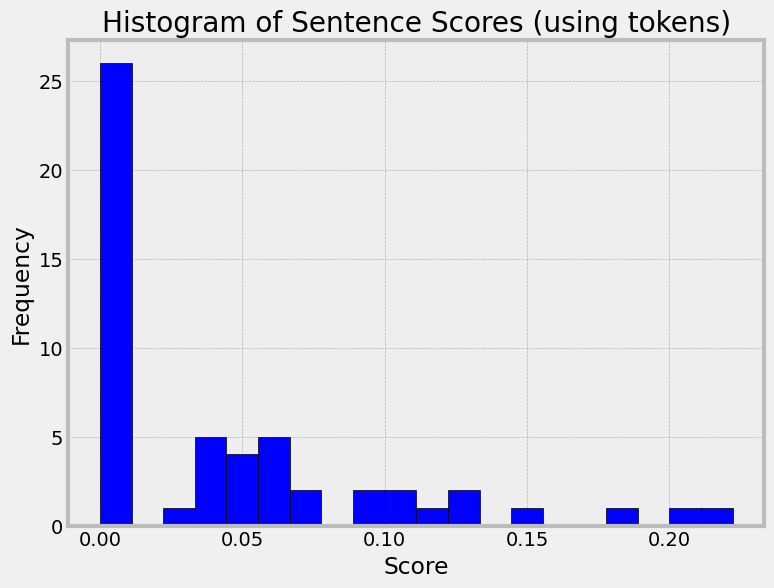

In [32]:
import matplotlib.pyplot as plt

# Set the matplotlib style
plt.style.use('bmh')

# Function to calculate score for each sentence using tokens
def calculate_sentence_scores(article_text, interesting_tokens):
    # Split the article text into sentences
    sentences = article_text.split('.')
    
    # Calculate score for each sentence
    scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences if sentence.strip()]
    
    return scores

# Calculate scores for every sentence in the article
sentence_scores = calculate_sentence_scores(article_text, frequent_tokens)

# Plot a histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sentence Scores (using tokens)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<span style="font-family: times new roman; color: violet; font-size: larger;">Module 6, Question 7</span>


<div style="background-color: #F883E2; padding: 10px;">
7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?
</div>

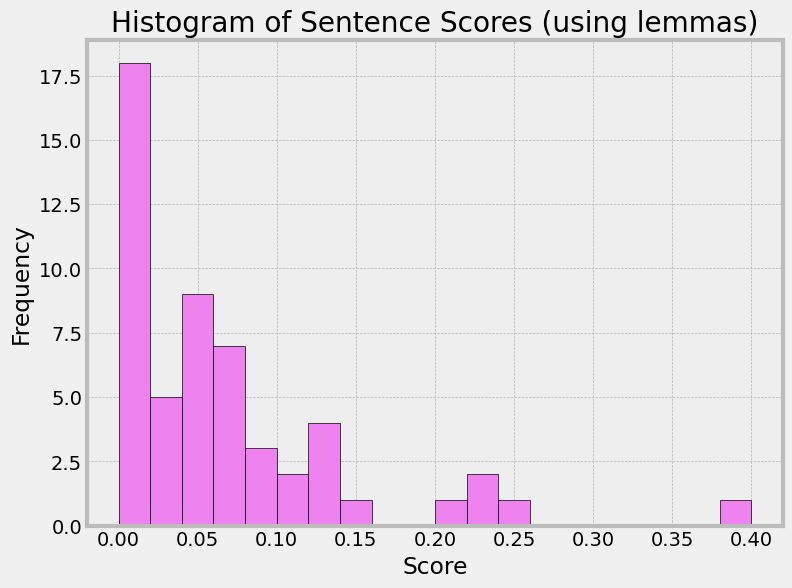

In [34]:
import matplotlib.pyplot as plt

# Set the matplotlib style
plt.style.use('bmh')

# Define the list of frequent lemmas
frequent_lemmas = ["laser", "headlight", "web/20210327165005", "data", "wp"]

# Function to calculate score for each sentence using lemmas
def calculate_sentence_scores_by_lemma(article_text, interesting_lemmas):
    # Split the article text into sentences
    sentences = article_text.split('.')
    
    # Calculate score for each sentence
    scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences if sentence.strip()]
    
    return scores

# Calculate scores for every sentence in the article using lemmas
sentence_scores_by_lemma = calculate_sentence_scores_by_lemma(article_text, frequent_lemmas)

# Plot a histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(sentence_scores_by_lemma, bins=20, color='violet', edgecolor='black')
plt.title('Histogram of Sentence Scores (using lemmas)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<span style="font-family: times new roman; color: darkorchid; font-size: larger;">Module 6, Question 8</span>


<div style="background-color: #D683F8; padding: 10px;">
8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).
</div>